<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/festtext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코드 참고
https://inspiringpeople.github.io/data%20analysis/word_embedding/

### 미리 훈련된 한국어 모델은 데이터는 https://fasttext.cc/docs/en/crawl-vectors.html 에서 제공하고 있습니다.

모델은 .vec .bin 의 두 가지 형태의 파일로 제공 하고 있는데,
.vec 파일은 라인마다 단어에 대한 vector가 있는 형태이고 
.bin 파일은 벡터 뿐만 아니라 dictionary와 모델의 하이퍼 파라미터와 같은 정보들이 모두 들어있는 형태입니다.

binary 파일을 사용하면 모델을 추가로 학습해서 개선할 수 있다고 합니다.

### 1. Pre-trained FastText
wikipedia 데이터 기반으로 학습된 전세계 294개 언어로 된 pre-trained fastText를 제공하고 있음
(parameter : 300 dimension, skip-gram model)
한국어의 경우 wiki.ko.bin / wiki.ko.vec 파일

In [14]:
%cd /content/drive/MyDrive/testtext

/content/drive/MyDrive/testtext


In [15]:
from __future__ import print_function
from gensim.models import KeyedVectors

# Creating the model
ko_model = KeyedVectors.load_word2vec_format('wiki.ko.vec')

In [16]:
# Getting the tokens 
words = []
for word in ko_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(ko_model[words[0]])
))

# Print out the vector of a word 
print("Vector components of a word: {}".format(
    ko_model[words[0]]
))

print(words[50])

Number of Tokens: 879129
Dimension of a word vector: 300
Vector components of a word: [ 4.0987e-01  5.3006e-03 -1.5832e+00 -1.0234e+00  2.7239e-01 -1.2325e+00
 -2.8500e-01 -5.9057e-01 -7.1622e-01 -7.8779e-01  4.6649e-02  3.1382e-01
 -4.1487e-01 -9.1984e-01 -3.0980e-01 -1.5516e-01  8.1917e-02 -8.8866e-01
 -2.6710e-02 -7.6736e-01  1.0054e+00 -2.7689e-01  6.0095e-01 -6.6004e-02
  5.7456e-01  6.7092e-01 -1.4202e-01  3.1292e-01 -8.1834e-01  3.1503e-01
  8.6697e-01 -9.3468e-01 -1.0193e+00  3.2536e-01 -6.4223e-01 -7.6901e-01
 -1.3965e+00 -1.2300e+00 -2.8656e-01 -3.4853e-01  1.0772e+00  1.2494e+00
  3.3720e-01 -7.6690e-01  6.3737e-01 -4.4553e-01  5.1555e-01 -3.8258e-01
  8.6264e-01 -6.9718e-01  1.4699e+00  6.7000e-01 -1.2923e+00 -1.0476e-01
  9.5305e-01  4.7174e-02  1.0691e+00  6.5087e-01  1.4713e+00 -8.3216e-01
  7.1885e-01  1.8395e+00 -4.4246e-01  3.1631e-01  7.3043e-02 -1.9448e+00
  1.0989e+00 -2.6499e+00  1.2871e+00 -1.2371e-01 -6.1374e-01  2.7363e-01
 -4.9095e-01  6.3166e-01 -5.0715e-01  

In [19]:
# Pick a word 
find_similar_to = '사랑'

# Finding out similar words [default= top 10]
for similar_word in ko_model.similar_by_word(find_similar_to):
    # print(similar_word)
    print("Word: {0}, Similarity: {1:.2f}".format(similar_word[0], similar_word[1]))

Word: 사랑사랑, Similarity: 0.81
Word: 사랑치, Similarity: 0.78
Word: 사랑일, Similarity: 0.77
Word: 사랑느낌, Similarity: 0.76
Word: 사랑이었네, Similarity: 0.76
Word: 사랑이여, Similarity: 0.75
Word: 사랑병, Similarity: 0.75
Word: 사랑인, Similarity: 0.75
Word: 사랑맛, Similarity: 0.75
Word: 사랑노래, Similarity: 0.74


In [20]:
# Test words 
word_add = ['동물', '파충류']
word_sub = ['뱀']

# Word vector addition and subtraction
for resultant_word in ko_model.most_similar(
    positive=word_add, negative=word_sub
):
    print("Word : {0} , Similarity: {1:.2f}".format(resultant_word[0], resultant_word[1]))

Word : 포유류 , Similarity: 0.72
Word : 포유동물 , Similarity: 0.71
Word : 절지동물 , Similarity: 0.69
Word : 양서류 , Similarity: 0.69
Word : 독동물 , Similarity: 0.69
Word : 포유류분류 , Similarity: 0.68
Word : 무척추동물 , Similarity: 0.68
Word : 척추동물분류 , Similarity: 0.68
Word : 도시동물 , Similarity: 0.68
Word : 동물상 , Similarity: 0.67


In [46]:
# 단어간 유사도 확인
print(f"{ko_model.similarity(w1='결혼', w2='이혼')}")
print(f"{ko_model.similarity(w1='한국', w2='미국')}")
print(f"{ko_model.similarity(w1='한국', w2='일본')}")

0.7604460716247559
0.5521387457847595
0.5805118680000305


# w2v과 Visualization해서 비교

wi.ko.vec에 저장된 88만여개 단어 중 선두 300개 단어를 2차원 상에 맵핑하면 다음과 같은 그림이 보여짐

In [38]:
words = ["car","bike","book","magazine","queen","king"]

# fasttext
ko_model_words = [ko_model[i] for i in words]

pca = PCA(n_components=2)
xys = pca.fit_transform(ko_model_words)
xys
xs = xys[:,0]
ys = xys[:,1]

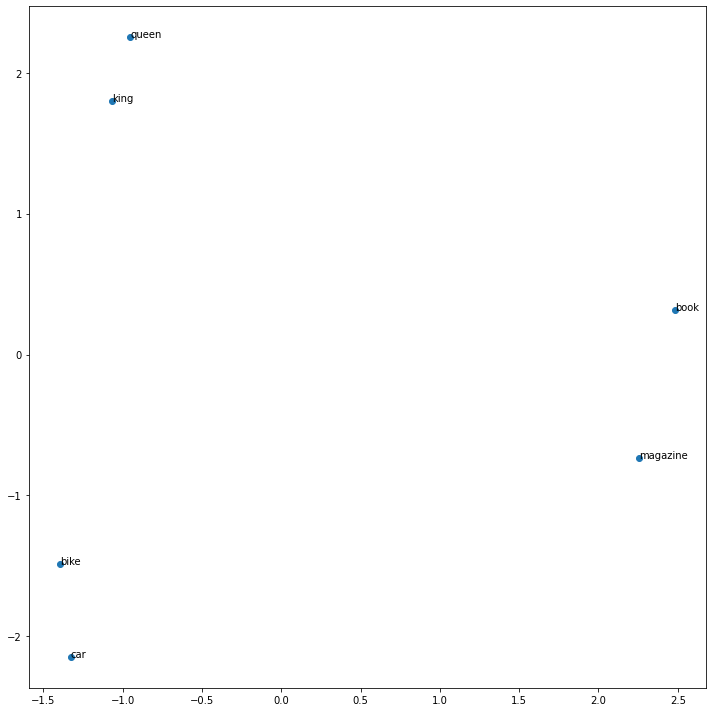

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.scatter(xs ,ys ,marker = 'o')
for i, v in enumerate(words):
  plt.annotate(v, xy=(xs[i], ys[i]))

In [43]:
# w2v

from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

# 미리 훈련된 word2vec 모델을 다운로드
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


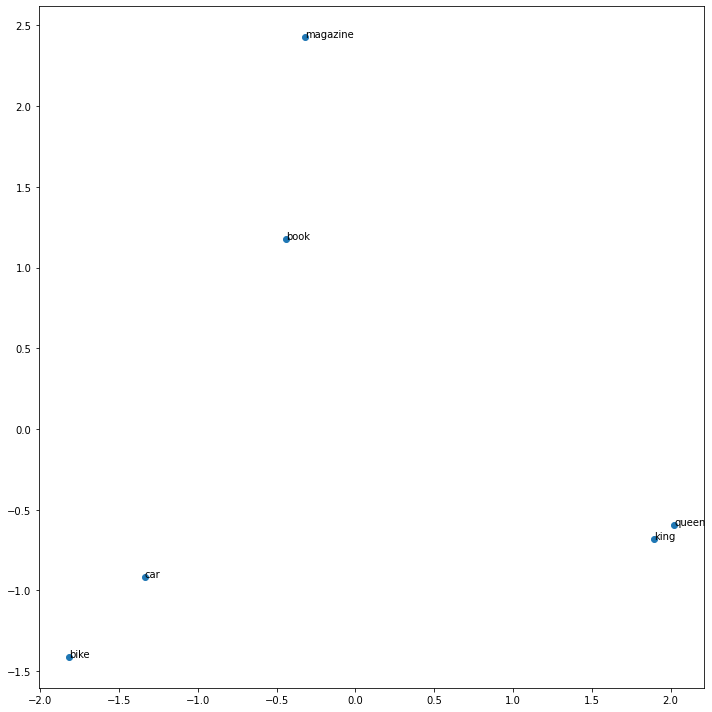

In [44]:
word2vecs = [wv[i] for i in words]

# pca = PCA(n_components=2)
xy = pca.fit_transform(word2vecs)
x = xy[:,0]
y = xy[:,1]

plt.figure(figsize=(10,10))

plt.scatter(x ,y ,marker = 'o')
for i, v in enumerate(words):
  plt.annotate(v, xy=(x[i], y[i]))